<a href="https://colab.research.google.com/github/pinheiroanifa5/CNN/blob/master/Own_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from keras.preprocessing.image import ImageDataGenerator
from keras import layers, models

In [2]:
train_dir = '/content/drive/MyDrive/Colab Notebooks/data/train'
validation_dir = '/content/drive/MyDrive/Colab Notebooks/data/validation'

In [3]:
import matplotlib.pyplot as plt

In [4]:
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

validation_datagen = ImageDataGenerator(rescale=1./255)

In [5]:
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(150, 150),
    batch_size=20,
    class_mode='binary'
)

validation_generator = validation_datagen.flow_from_directory(
    validation_dir,
    target_size=(150, 150),
    batch_size=20,
    class_mode='binary'
)

Found 177 images belonging to 3 classes.
Found 0 images belonging to 3 classes.


In [6]:
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(512, activation='relu'),
    layers.Dense(1, activation='sigmoid')
])

In [7]:
model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [8]:
history = model.fit(
    train_generator,
    steps_per_epoch=2,
    epochs=2,
    validation_data=validation_generator,
    validation_steps=50
)

model.save('model_cats_vs_dogs.h5')

Epoch 1/2
2/2 [==============================] - 5s 1s/step - loss: -1.4791 - accuracy: 0.2250
Epoch 2/2
2/2 [==============================] - 3s 1s/step - loss: -34.9600 - accuracy: 0.4000


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


Predictions

In [9]:
from keras.models import load_model
from keras.preprocessing import image
import numpy as np
import matplotlib.pyplot as plt

In [11]:
def load_and_process_image(img_path):
    img = image.load_img(img_path, target_size=(150, 150))
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)
    img_array /= 255.0  # Normalização
    return img_array

1/1 [==============================] - 0s 32ms/step


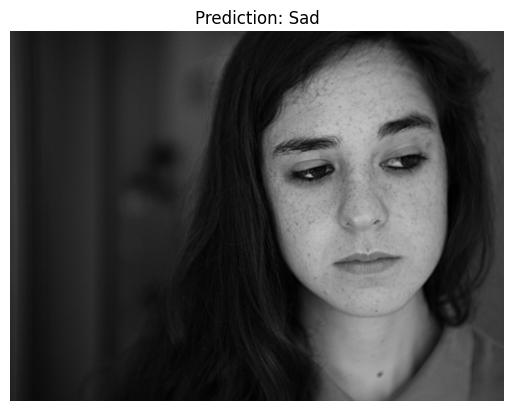

1/1 [==============================] - 0s 49ms/step


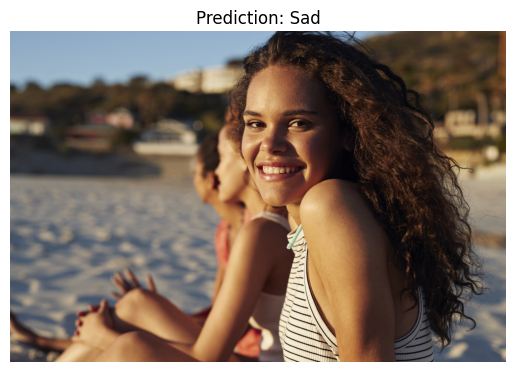

In [14]:
def predict_and_show(img_path):
    img_array = load_and_process_image(img_path)
    prediction = model.predict(img_array)
    class_name = 'Sad' if prediction[0] > 0.5 else 'Happy'

    plt.imshow(image.load_img(img_path))
    plt.title(f'Prediction: {class_name}')
    plt.axis('off')
    plt.show()

test_images = ['/content/drive/MyDrive/Colab Notebooks/pablo-varela-311608.jpg', '/content/drive/MyDrive/Colab Notebooks/tmp_6mv7xy_5d5b15258a507669_GettyImages-847741712.jpg']

for img_path in test_images:
    predict_and_show(img_path)